<a href="https://colab.research.google.com/github/J-DR1/MastersThesis/blob/main/1_KDD_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic Packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

##Pre-processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import preprocessing

#Warnings
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Whole Dataset
names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kdd_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kddcup99.csv", names=names)
kdd_http = kdd_data[kdd_data['service'] == 'http'].reset_index(drop=True)
kdd_http = kdd_http[["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]]
kdd_http.head(5) 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
kdd_http.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64293 entries, 0 to 64292
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     64293 non-null  int64  
 1   protocol_type                64293 non-null  object 
 2   service                      64293 non-null  object 
 3   flag                         64293 non-null  object 
 4   src_bytes                    64293 non-null  int64  
 5   dst_bytes                    64293 non-null  int64  
 6   land                         64293 non-null  int64  
 7   wrong_fragment               64293 non-null  int64  
 8   urgent                       64293 non-null  int64  
 9   hot                          64293 non-null  int64  
 10  num_failed_logins            64293 non-null  int64  
 11  logged_in                    64293 non-null  int64  
 12  num_compromised              64293 non-null  int64  
 13  root_shell      

In [ ]:
#removing redundant features
kdd_http = kdd_http[[col for col in kdd_http if kdd_http[col].nunique() > 1]]


In [ ]:
kdd_http.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64293 entries, 0 to 64292
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     64293 non-null  int64  
 1   flag                         64293 non-null  object 
 2   src_bytes                    64293 non-null  int64  
 3   dst_bytes                    64293 non-null  int64  
 4   hot                          64293 non-null  int64  
 5   logged_in                    64293 non-null  int64  
 6   num_compromised              64293 non-null  int64  
 7   root_shell                   64293 non-null  int64  
 8   num_root                     64293 non-null  int64  
 9   num_access_files             64293 non-null  int64  
 10  count                        64293 non-null  int64  
 11  srv_count                    64293 non-null  int64  
 12  serror_rate                  64293 non-null  float64
 13  srv_serror_rate 

In [ ]:
kdd_http["label"].value_counts()

normal.       61886
back.          2203
neptune.        192
phf.              4
portsweep.        3
ipsweep.          3
satan.            2
Name: label, dtype: int64

In [ ]:
#Adding Attack Type column
attacks_types = {
  'normal.': 'normal',
  'back.': 'dos',
  'ipsweep.': 'probe',
  'neptune.': 'dos',
  'phf.': 'r2l',
  'portsweep.': 'probe',
  'satan.': 'probe'}

kdd_http['Attack Type'] = kdd_http["label"].map(attacks_types)
kdd_http['Attack Type'].value_counts()

normal    61886
dos        2395
probe         8
r2l           4
Name: Attack Type, dtype: int64

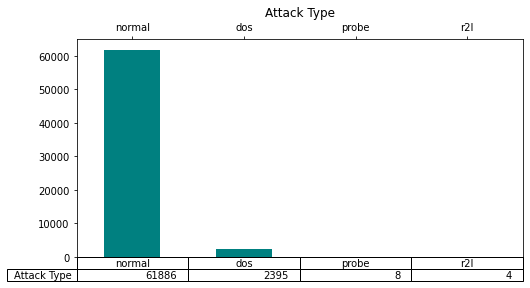

In [ ]:
#Visualization
def bar_graph(feature):
    kdd_http[feature].value_counts().plot(kind="bar",
                                          layout =True,
                                          use_index = True,
                                          title = 'Attack Type',
                                          grid = False,
                                          color ='teal',
                                          table = True).xaxis.tick_top()

plt.figure(figsize=(8,4))
bar_graph('Attack Type')  

In [ ]:
#Crosstab of Attack Type vs labels
crosstab = kdd_http.groupby(['Attack Type'])["label"].value_counts()
crosstab

Attack Type  label     
dos          back.          2203
             neptune.        192
normal       normal.       61886
probe        ipsweep.          3
             portsweep.        3
             satan.            2
r2l          phf.              4
Name: label, dtype: int64

In [ ]:
#Dropping label column since new column attack type created
kdd_http = kdd_http.drop(['label'], axis=1)

In [ ]:
# Encoding the nominal variables to numerical
encoder = OneHotEncoder(categories='auto', sparse=False)
flag_encoded = pd.DataFrame(encoder.fit_transform(kdd_http['flag'].values.reshape(-1,1)), columns=encoder.get_feature_names())
kdd_http.drop(['flag'] ,axis=1, inplace=True)
kdd_http = pd.concat([kdd_http, flag_encoded ], axis=1)
kdd_http

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_root,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type,x0_REJ,x0_RSTO,x0_RSTR,x0_S0,x0_S1,x0_S2,x0_S3,x0_SF
0,0,181,5450,0,1,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,239,486,0,1,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,235,1337,0,1,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,219,1337,0,1,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,217,2032,0,1,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64288,0,310,1881,0,1,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64289,0,282,2286,0,1,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64290,0,203,1200,0,1,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64291,0,291,1200,0,1,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#To csv : cleaned dataset
kdd_http.to_csv("kdd_http_cleaned.csv", index = False) 